In [35]:

import numpy as np

import gymnasium as gym  # Correct way to import Gymnasium
from gymnasium.spaces import Dict, Discrete, Box
from minigrid.core.constants import COLOR_NAMES
from minigrid.core.constants import DIR_TO_VEC
from minigrid.core.grid import Grid
from minigrid.core.actions import Actions
from minigrid.core.mission import MissionSpace
from minigrid.core.world_object import Door, Goal, Key, Wall
from minigrid.manual_control import ManualControl
from minigrid.minigrid_env import MiniGridEnv
from gymnasium.utils.play import play
from gymnasium import ObservationWrapper, spaces
from minigrid.wrappers import FullyObsWrapper
import pandas as pd
# Visualization imports
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.special import logsumexp


import os, glob
import pickle
from pathlib import Path
import matplotlib.pyplot as plt
import sys


from moviepy import VideoFileClip, TextClip, CompositeVideoClip
from moviepy import ImageSequenceClip

import random
SEED = 42
np.random.seed(SEED)

In [7]:
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = 'Arial'

In [36]:
# pickling varibles
variables_to_save = {
    "museum mask": museum_mask_03m,
    "museum_df": museum_df,
    "state map": state_map,
    
        
}

with open("stored_vars.pkl", "wb") as f:
    pickle.dump(variables_to_save, f)



In [8]:
%matplotlib inline

In [9]:
%store -r museum_mask_03m

In [10]:
mask = museum_mask_03m
mask = np.flipud(mask)

traces from museum

In [11]:
%store -r museum_df

In [12]:
museum_df

,file,time,x,y,state,visibility
0,cluster_001.csv,"[0.0, 9.45179584120983e-05, 0.0001890359168241...","[0.6086956521739131, 0.6086956521739131, 0.608...","[0.6756756756756757, 0.6756756756756757, 0.675...","[0.20857988165680474, 0.20857988165680474, 0.2...","[11, 11, 11, 12, 12, 12, 11, 11, 12, 12, 12, 1..."
1,cluster_002.csv,"[0.0, 3.066638044711583e-05, 6.133276089423166...","[0.8695652173913043, 0.8695652173913043, 0.869...","[0.16216216216216217, 0.16216216216216217, 0.1...","[0.9644970414201184, 0.9644970414201184, 0.964...","[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ..."
2,cluster_003.csv,"[0.02491408934707904, 0.02534364261168385, 0.0...","[0.014492753623188406, 0.014492753623188406, 0...","[0.6756756756756757, 0.6756756756756757, 0.675...","[0.17825443786982248, 0.17825443786982248, 0.1...","[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ..."
3,cluster_004.csv,"[0.0, 0.0004803073967339097, 0.000960614793467...","[0.07246376811594203, 0.07246376811594203, 0.0...","[0.7027027027027027, 0.7027027027027027, 0.702...","[0.14127218934911243, 0.14127218934911243, 0.1...","[10, 10, 10, 10, 10, 9, 10, 10, 10, 10, 9, 9, ..."
4,cluster_007.csv,"[0.007297433316557625, 0.007800704579768495, 0...","[0.014492753623188406, 0.014492753623188406, 0...","[0.7027027027027027, 0.7027027027027027, 0.702...","[0.13831360946745563, 0.13831360946745563, 0.1...","[7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, ..."
5,cluster_009.csv,"[0.0019734987313222443, 0.002537355511700028, ...","[0.014492753623188406, 0.014492753623188406, 0...","[0.7567567567567568, 0.7567567567567568, 0.756...","[0.058431952662721894, 0.058431952662721894, 0...","[8, 8, 8, 8, 8, 8, 7, 8, 7, 7, 7, 7, 7, 7, 7, ..."
6,cluster_012.csv,"[0.001634827888952802, 0.001695377070025128, 0...","[0.014492753623188406, 0.014492753623188406, 0...","[0.6486486486486487, 0.6216216216216216, 0.621...","[0.21819526627218935, 0.2581360946745562, 0.25...","[7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ..."
7,cluster_017.csv,"[0.012419006479481642, 0.01259899208063355, 0....","[0.014492753623188406, 0.014492753623188406, 0...","[0.7567567567567568, 0.7567567567567568, 0.756...","[0.058431952662721894, 0.058431952662721894, 0...","[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 8, 7, 7, 8, ..."
8,cluster_018.csv,"[0.011353232008789599, 0.011719465299395715, 0...","[0.014492753623188406, 0.014492753623188406, 0...","[0.6486486486486487, 0.6486486486486487, 0.648...","[0.21819526627218935, 0.21819526627218935, 0.2...","[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, ..."
9,cluster_021.csv,"[0.00866113316492241, 0.009022013713460845, 0....","[0.014492753623188406, 0.014492753623188406, 0...","[0.7027027027027027, 0.7027027027027027, 0.702...","[0.13831360946745563, 0.13831360946745563, 0.1...","[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, ..."


# Define Environment

In [31]:

class SimpleEnv(MiniGridEnv):
    def __init__(
            self, 
            agent_start_pos=(1, 30), # bottom left entrance ( 1, 30) top right corner (63, 5)
            agent_start_dir=0, 
            max_steps=50,
            mask = None, 
            reward_mask = None,
            
            **kwargs,
    ):
        
    
        height, width = mask.shape
        self.agent_start_pos = agent_start_pos
        self.agent_start_dir = agent_start_dir
        self.agent_dir = 0 #facing up always
        # self.goal_pos = (30, 15)
        self.mask = mask
        self.reward_mask = reward_mask
        self.visited_reward_0 = set()  # holds (x, y) tuples

        
        
        
        mission_space = MissionSpace(mission_func=self._gen_mission)

        super().__init__(
            mission_space=mission_space,
            # grid_size=max(width, height),
            width=width,
            height=height,
            max_steps=max_steps,
            **kwargs,
        )

        # Restore correct values
        self.width = width
        self.height = height

        self.action_space = gym.spaces.Discrete(5)
    @staticmethod
    def _gen_mission():
        return "Museum"

    def _gen_grid(self, width, height):

        self.grid = Grid(self.width, self.height)

        for y in range(self.mask.shape[0]):
            for x in range(self.mask.shape[1]):
                if not self.mask[y, x]:
                    self.grid.set(x, y, Wall())



        #place goal
        # self.put_obj(Goal(), 30, 15)

        if self.agent_start_pos is not None:
            self.agent_pos = self.agent_start_pos #check this
            self.agent_dir = self.agent_start_dir
        else:
            self.place_agent()

        self.mission = "Museum"

        # print(f"agent_start = {self.agent_start_pos}")
        print(f"[DEBUG] Initialized grid {self.width}x{self.height}, agent at {self.agent_pos}")

    def step(self, action):
        terminated = False
        truncated = False
        x, y = map(int, self.agent_pos)
   

        # Define absolute movement
        if action == 0:      # stay
            dx, dy = 0, 0
        elif action == 1:    # up
            dx, dy = 0, -1
        elif action == 2:    # down
            dx, dy = 0, 1
        elif action == 3:    # left
            dx, dy = -1, 0
        elif action == 4:    # right
            dx, dy = 1, 0
        else:
            raise ValueError(f"Invalid action: {action}")

        new_x, new_y = int(x + dx), int(y + dy)

        # Stay in bounds
        if not (0 <= new_x < self.width and 0 <= new_y < self.height):
            new_x, new_y = x, y

        # Check for wall
        target_cell = self.grid.get(new_x, new_y)
        if target_cell is not None and not target_cell.can_overlap():
            new_x, new_y = x, y  # can't move into wall

        self.agent_pos = (new_x, new_y)


        reward = 0 # hard coded because reward logic doesn't matter
        obs = self.gen_obs()

        info = {}

        return obs, reward, terminated, truncated, info
    
    
    def count_states(self):
        free_cells = sum(1 for x in range(self.grid.width)
                      for y in range(self.grid.height)
                      if not self.grid.get(x, y)) * 4
        return free_cells 


In [32]:
env = SimpleEnv(render_mode= None, mask = mask, reward_mask= None)
env.reset();

[DEBUG] Initialized grid 69x37, agent at (1, 30)


# Functions for MaxEnt IRL

In [14]:
def make_demos(museum_df):

    """Collection of features from museum trajectories"""
    df = museum_df
     # a list of features for each traces
    demos = []
    for trace in np.arange(df.shape[0]):
        demo = []
        for i in range(len(df.iloc[trace, 1])):
            t, x, y, state, visibility = df.iloc[trace, 1][i], df.iloc[trace, 2][i], df.iloc[trace, 3][i], df.iloc[trace, 4][i], df.iloc[trace, 5][i]
            feat = np.array([t, x, y, state, visibility])
            demo.append(feat)
        demos.append(np.array(demo))
    return demos

  
    

In [2]:
demos = make_demos(museum_df)

NameError: name 'make_demos' is not defined

In [1]:
demos[0]

NameError: name 'demos' is not defined

In [17]:
# state transition logic
def action_selection(demos_list):
    """
    Extract action sequences from demos following MiniGrid (0,0 top-left).
    
    Actions:
        0 = stay
        1 = up    (dy = -1)
        2 = down  (dy = +1)
        3 = left  (dx = -1)
        4 = right (dx = +1)
    """
    def get_actions_from_demo(demo):
        actions = []
        for i in range(len(demo) - 1):
            t, x, y, state, vis = demo[i]
            t_n, x_n, y_n, state_n, vis_n = demo[i + 1]

            if (x == x_n) and (y == y_n):
                action = 0
            elif (x == x_n) and (y_n == y - 1):  # up
                action = 1
            elif (x == x_n) and (y_n == y + 1):  # down
                action = 2
            elif (x_n == x - 1) and (y == y_n):  # left
                action = 3
            elif (x_n == x + 1) and (y == y_n):  # right
                action = 4
            else:
                raise ValueError(f"Invalid transition: {(x, y)} -> {(x_n, y_n)}")

            actions.append(action)
        return np.array(actions)

    if len(demos_list) == 1:
        print("Single demo actions:")
        return get_actions_from_demo(demos_list[0])
    else:
        all_demos_actions = [get_actions_from_demo(demo) for demo in demos_list]
        print("Multiple demo actions")
        return all_demos_actions


               

In [18]:
def action_selection(demos_list):
    """
    Extract action sequences from demos with 8-direction moves.
    
    Actions:
        0 = stay
        1 = up        (dx=0,  dy=-1)
        2 = down      (dx=0,  dy=+1)
        3 = left      (dx=-1, dy=0)
        4 = right     (dx=+1, dy=0)
        5 = up-left   (dx=-1, dy=-1)
        6 = up-right  (dx=+1, dy=-1)
        7 = down-left (dx=-1, dy=+1)
        8 = down-right(dx=+1, dy=+1)
    """
    def get_actions_from_demo(demo):
        actions = []
        for i in range(len(demo) - 1):
            _, x, y, *_ = demo[i]
            _, x_n, y_n, *_ = demo[i + 1]

            dx, dy = int(x_n - x), int(y_n - y)

            if   (dx, dy) == (0, 0):  action = 0
            elif (dx, dy) == (0,-1):  action = 1
            elif (dx, dy) == (0, 1):  action = 2
            elif (dx, dy) == (-1,0):  action = 3
            elif (dx, dy) == ( 1,0):  action = 4
            elif (dx, dy) == (-1,-1): action = 5
            elif (dx, dy) == ( 1,-1): action = 6
            elif (dx, dy) == (-1, 1): action = 7
            elif (dx, dy) == ( 1, 1): action = 8
            else:
                raise ValueError(f"Invalid transition: {(x, y)} -> {(x_n, y_n)}")

            actions.append(action)
        return np.array(actions)

    if len(demos_list) == 1:
        return get_actions_from_demo(demos_list[0])
    else:
        return [get_actions_from_demo(demo) for demo in demos_list]

In [19]:
actions = action_selection(demos)

In [20]:
#visibility
visibility_df = pd.read_csv('/Users/iuliarusu/Documents/museum/drop_model_movement/walkable_positions_with_visibility.csv')
# x = visibility.iloc[:, 1].values  
# y = visibility.iloc[:, 2].values  
c = visibility_df.iloc[:, 3].values 

In [21]:
%store -r state_map

In [22]:
state_map

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]], shape=(37, 69))

In [24]:
def check_state_consistency(state_map, P, df):
    for _, row in df.iterrows():
        for sid, x, y in zip(row['state'], row['x'], row['y']):
            # (x,y) from your dataframe
            df_coord = (x, y)

            # (x,y) from raw state_map lookup
            coords_from_map = np.argwhere(state_map == sid)[0][::-1]  # (x,y) order
            map_coord = tuple(coords_from_map)

            if df_coord != map_coord:
                print(f"Mismatch for state {sid}: df={df_coord}, map={map_coord}")

In [25]:
def map_states_from_P(state_map, use_minigrid_coords=True):
    """
    Build a dictionary mapping state_id -> (x, y) coordinates
    consistent with how P was built.
    """
    if use_minigrid_coords:
        canonical_map = np.flipud(state_map).T  # shape = (W, H)
    else:
        canonical_map = state_map               # shape = (H, W)

    lookup = {}

    if use_minigrid_coords:
        W, H = canonical_map.shape
        for x in range(W):
            for y in range(H):
                s = canonical_map[x, y]
                if s >= 0:
                    lookup[int(s)] = (x, y)
    else:
        H, W = canonical_map.shape
        for y in range(H):
            for x in range(W):
                s = canonical_map[y, x]
                if s >= 0:
                    lookup[int(s)] = (x, y)

    return lookup


In [26]:

### functions for my actual code ###

def state_to_feature(state, t, state_map, c, T):
    """
    Return feature vector [t, x, y, state, visibility] for one state.
    """
    # Find (x, y) for this state in the flipped+transposed map
    x = np.where(np.flipud(state_map).T == state)[0][0]
    y = np.where(np.flipud(state_map).T == state)[1][0]

    visibility = c[state]

    W,H = state_map.T.shape
    nstates = state_map.max() + 1

    return np.array([t/ T, x/W, y/H, state/nstates, visibility], dtype=float)



def collect_expert_features(demos):
    """Compute average feature expectations from expert trajectories."""
    feats = []
    for traj in demos:  # each traj = list of (state, action, next_state)
        fsum = np.zeros(demos[0][0].shape[0])  # fix later
        for (t, x, y, state, visibility) in traj:
            fsum += np.array([t, x, y, state, visibility])
        feats.append(fsum)
    return np.mean(feats, axis=0)



# -------------------
# Ue distribution ( expert feature counts)
# --------------------
def demo_state_counts(demos, env):
    n_states = env.width * env.height
    counts = np.zeros(n_states)
    for demo in demos:
        for _, _, _, state, _ in demo:
            counts[int(state)] += 1
    return counts / np.sum(counts)

#------------------
# Calculate P for env
# ____________________

def build_transition_model(env, state_map):
    """
    Build a tabular transition model P for a gridworld with given actions.

    Parameters
    ----------
    width, height : int
        Grid dimensions.
    state_map : np.ndarray (height, width)
        Mapping from (y, x) -> state index, -1 if not walkable.
    action_deltas : dict
        Mapping action -> (dx, dy).

    Returns
    -------
    P : dict
        P[state][action] = [(prob, next_state, reward, done)]
    """

    # 9-action scheme (with diagonals)
    action_deltas = {
        0: (0, 0),    # stay
        1: (0, -1),   # up
        2: (0, 1),    # down
        3: (-1, 0),   # left
        4: (1, 0),    # right
        # 5: (-1, -1),  # up-left
        # 6: (1, -1),   # up-right
        # 7: (-1, 1),   # down-left
        # 8: (1, 1)     # down-right
    }
    P = {}
    n_states = np.max(state_map) + 1

    for y in range(env.height):
        for x in range(env.width):
            s = np.flipud(state_map).T[x, y]
            if s == -1:  # not a valid state
                continue

            P[s] = {}

            for a, (dx, dy) in action_deltas.items():
                nx, ny = x + dx, y + dy

                # stay in place if move is invalid
                if nx < 0 or nx >= env.width or ny < 0 or ny >= env.height:
                    s_next = s
                elif np.flipud(state_map).T[nx, ny] == -1:
                    s_next = s
                else:
                    s_next = np.flipud(state_map).T[nx, ny]

                # deterministic transition
                P[s][a] = [(1.0, s_next, 0.0, False)]

    return P


# -------------------------
def soft_value_iteration(P, rewards, gamma=0.99, eps=1e-2 ):
    """
    Compute the soft-optimal value function and policy under MaxEnt IRL.
    env: finite MDP with .P[state][action] -> [(prob, next_state, reward, done)]
    rewards: vector of shape (n_states,)
    """
    n_states = len(P) 
    n_actions = 4 + 1  # 5 actions: stay, up, down, left, right, ###and diagonals
    V = np.zeros(n_states)
    while True:
        V_prev = V.copy()
        for s in range(n_states):
            q_vals = []
            for a in range(n_actions):
                q = 0
                for prob, s_next, _, _ in P[s][a]:
                    q += prob * (rewards[s] + gamma * V_prev[s_next])
                q_vals.append(q)
            V[s] = logsumexp(q_vals) # soft-max backup
        if np.max(np.abs(V - V_prev)) < eps:
            break
    # Compute policy
    policy = np.zeros((n_states, n_actions))
    for s in range(n_states):
        q_vals = []
        for a in range(n_actions):
            q = 0
            for prob, s_next, _, _ in P[s][a]:
                q += prob * (rewards[s] + gamma * V[s_next])
            q_vals.append(q)
        q_vals = np.array(q_vals)
        policy[s] = np.exp(q_vals - np.max(q_vals))
        policy[s] /= np.sum(policy[s])
    return V, policy


# -------------------------
# Compute feature expectations under policy
# -------------------------

def compute_policy_feature_expectations(P, c, policy, state_to_feature, state_map, n_rollouts=50, horizon=8652):
    feats = []
    n_actions = policy.shape[1]

    for _ in range(n_rollouts):
        s = 0 #np.random.choice(list(P.keys()))  # start from random state, can switch later
        fsum = np.zeros_like(state_to_feature(s, 0, state_map, c, horizon))  # t = 0

        for t in range(horizon):
            # add features for current state
            fsum += state_to_feature(s, t, state_map, c, horizon)

            # sample action from policy
            a = np.random.choice(n_actions, p=policy[s])

            # sample next state from P[s][a]
            transitions = P[s][a]
            probs, next_states = zip(*[(prob, ns) for prob, ns, _, _ in transitions])
            s = np.random.choice(next_states, p=probs)

        feats.append(fsum)

    return np.mean(feats, axis=0)




def maxent_irl(P, demos, state_map, c, state_to_feature, horizon = 8652, lr=0.1, n_iters=50, gamma=0.99):
    """
    Maximum Entropy IRL training loop.

    Parameters
    ----------
    P : dict
        Transition model: P[s][a] = [(prob, next_state, reward, done)]
    demos : list
        List of expert demos (each a list of features or states).
    state_map : np.ndarray
        State map (height, width) with state IDs.
    c : np.ndarray
        Visibility array indexed by state ID.
    state_to_feature : function
        Function mapping (state, t, state_map, c) -> feature vector.
    lr : float
        Learning rate for gradient ascent.
    n_iters : int
        Number of gradient iterations.
    gamma : float
        Discount factor for value iteration.

    Returns
    -------
    theta : np.ndarray
        Learned reward weights.
    rewards : np.ndarray
        Final reward function over states.
    policy : np.ndarray
        Final policy (n_states × n_actions).
    """

    # --- Step 1: Expert feature expectations ---
    expert_feats = []
    for demo in demos:
        # demo is already [t, x, y, state, visibility]
        fsum = np.sum([np.array([t, x, y, s, vis], dtype=float)
                       for (t, x, y, s, vis) in demo], axis=0)
        expert_feats.append(fsum)
    expert_mu = np.mean(expert_feats, axis=0)

    n_states = int(state_map.max()) + 1
    n_features = len(state_to_feature(0, 0, state_map, c, horizon))
    theta = np.random.randn(n_features)

    # --- Step 2: IRL loop ---
    for it in range(n_iters):
        # Compute reward for each state
        rewards = np.zeros(n_states)
        for s in range(n_states):
            feats = state_to_feature(s, 0, state_map, c, horizon)
            rewards[s] = np.dot(theta, feats) #currently doesn't take time into account
            

        # Soft value iteration → policy
        print( "starting svp")
        V, policy = soft_value_iteration(P, rewards, gamma=gamma)

        # Policy feature expectations
        print("starting compute policy feature expectations")
        mu_pi = compute_policy_feature_expectations(P, c, policy, state_to_feature, state_map)

        # Gradient update
        grad = expert_mu - mu_pi
        theta += lr * grad

        print("expert_mu:", expert_mu[:5])
        print("mu_pi:", mu_pi[:5])
        print(f"Iter {it}: ||grad||={np.linalg.norm(grad):.3f}")

    return theta, rewards, policy



In [33]:
P = build_transition_model(env, state_map)

# testing maxent irl

In [136]:
theta, rewards, policy = maxent_irl(P, demos, state_map, c, state_to_feature, lr=0.0001, n_iters=50)

starting svp
starting compute policy feature expectations
expert_mu: [ 4326.14376236  5371.82162765  3078.64449064  5796.12329313
 73595.15384615]
mu_pi: [ 4325.5         7741.66782609  1404.93783784  8342.01908284
 60519.72      ]
Iter 0: ||grad||=13633.269
starting svp
starting compute policy feature expectations
expert_mu: [ 4326.14376236  5371.82162765  3078.64449064  5796.12329313
 73595.15384615]
mu_pi: [  4325.5          6193.79246377   5576.63135135   2249.99926036
 103298.32      ]
Iter 1: ||grad||=30029.463
starting svp
starting compute policy feature expectations
expert_mu: [ 4326.14376236  5371.82162765  3078.64449064  5796.12329313
 73595.15384615]
mu_pi: [ 4325.5         1581.07826087  2788.29513514  6005.37568047
 17473.4       ]
Iter 2: ||grad||=56250.770
starting svp
starting compute policy feature expectations
expert_mu: [ 4326.14376236  5371.82162765  3078.64449064  5796.12329313
 73595.15384615]
mu_pi: [  4325.5          3000.35014493   2926.65297297   5856.1970858


# testing out converstion fxn

In [164]:
def run_policy(env, policy, state_map, step_count):
    """Run the environment using the learned policy from a MaxEnt IRL."""

    env.reset()[0]  # Reset environment
    x, y = env.agent_pos # Convert starting position to index
    current_state = np.flipud(state_map).T[x, y]

    step_count = 0  # Track steps to prevent infinite loops

    while step_count < 1000:  # Prevent infinite loops

        action = np.random.choice(len(policy[current_state]), p=policy[current_state]) # Choose best action, probabilitically
        obs, reward, terminated, truncated, info = env.step(action)  # Take action
        x_t, y_t = env.agent_pos
        next_state =  np.flipud(state_map).T[x_t, y_t]# Convert new state
        env.render()  # Visualize movement
        # Calculate info to go term for the current step
        print(f"current state: {current_state}, action: {action}, next state: {next_state}")
        current_state = next_state  # Update current state
        step_count += 1

In [194]:
run_policy(env, policy, state_map, step_count=100)

[DEBUG] Initialized grid 69x37, agent at (1, 30)
current state: 0, action: 1, next state: 38
current state: 38, action: 4, next state: 39
current state: 39, action: 1, next state: 80
current state: 80, action: 4, next state: 81
current state: 81, action: 4, next state: 82
current state: 82, action: 4, next state: 83
current state: 83, action: 4, next state: 84
current state: 84, action: 4, next state: 85
current state: 85, action: 4, next state: 86
current state: 86, action: 1, next state: 140
current state: 140, action: 4, next state: 141
current state: 141, action: 4, next state: 142
current state: 142, action: 1, next state: 196
current state: 196, action: 4, next state: 197
current state: 197, action: 4, next state: 198
current state: 198, action: 4, next state: 199
current state: 199, action: 4, next state: 200
current state: 200, action: 4, next state: 201
current state: 201, action: 4, next state: 202
current state: 202, action: 4, next state: 203
current state: 203, action: 4, 

# plot reward as function of space

In [168]:
rewards.shape

(1352,)

In [169]:
policy

array([[4.68056696e-05, 5.08647094e-01, 4.68056696e-05, 4.68056696e-05,
        4.91212489e-01],
       [4.58729522e-05, 8.30910108e-01, 4.58729522e-05, 4.37104980e-09,
        1.68998142e-01],
       [4.54367542e-05, 9.57504494e-01, 4.54367542e-05, 1.23333785e-08,
        4.24046204e-02],
       ...,
       [4.89257064e-02, 4.89257064e-02, 2.92929962e-01, 6.06036030e-01,
        3.18259462e-03],
       [5.41250902e-02, 5.41250902e-02, 5.88658193e-02, 8.32059557e-01,
        8.24443388e-04],
       [1.45180816e-02, 1.45180816e-02, 3.32697468e-03, 9.53118780e-01,
        1.45180816e-02]], shape=(1352, 5))

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1352 is different from 5)

In [177]:
theta.shape

(5,)

In [206]:
rewards

array([ 9.14616839,  9.21956121,  9.29295402, ..., 18.16157333,
       18.23496615, 16.87679707], shape=(1352,))

In [230]:

def compute_rewards(theta, state_map, c, state_to_feature, horizon):
    """Compute reward for each state given learned weights theta."""
    final_rewards = np.zeros(state_map.T.shape)
    ret_rewards = np.zeros(state_map.T.shape)
    fin_flat = np.zeros(int(state_map.max()) + 1)
    
    for s in range(int(state_map.max()) + 1):
        # t, x, y, state, visbility = state_to_feature(s, 0, state_map, c, horizon)
        feats = state_to_feature(s, 0, state_map, c, horizon)
        r = np.dot(theta, feats)
        x = np.where(np.flipud(state_map).T == s)[0][0]
        y = np.where(np.flipud(state_map).T == s)[1][0]
        final_rewards[x][y] = r
        ret_rewards[x][y] = rewards[s]
        fin_flat[s] = r
    
    return final_rewards, ret_rewards, fin_flat

    
                

In [231]:
final_r, ret_r, fin_flat = compute_rewards(-theta, state_map, c, state_to_feature, horizon=8652)

In [226]:
theta

array([-0.49456249,  4.85327559, -1.41255955,  2.85674365, -1.54017272])

In [227]:
final_r[1,30]

np.float64(0.0)

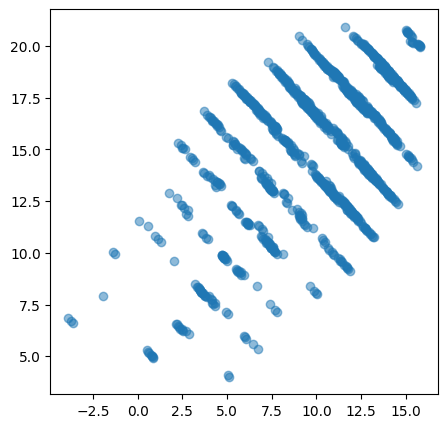

In [232]:
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(fin_flat, rewards, alpha=0.5)

Text(0.5, 1.0, 'Museum Reward Structure from MaxEnt IRL')

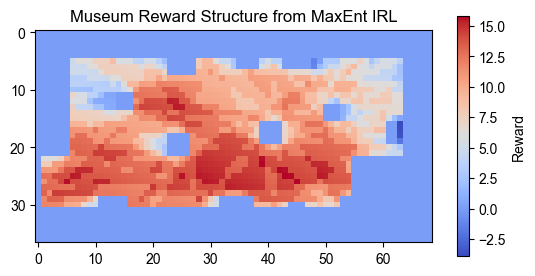

In [241]:
plt.imshow(final_r.T, cmap='coolwarm')
plt.colorbar(label='Reward', shrink=0.65)
plt.title("Museum Reward Structure from MaxEnt IRL")

# Information to Go Terms and Plotting

In [243]:
# P(s)

#get probability of state using time probability
def build_policy_transition_matrix(P, policy):
    """Built s_next by s matrix"""
    n_states = len(P)
    n_actions = policy.shape[1]
    P_pi = np.zeros((n_states, n_states))
    for s in range(n_states):
        for a in range(n_actions):
            for prob, s_next, _, _ in P[s][a]:
                P_pi[s, s_next] += policy[s, a] * prob
    return P_pi


def compute_state_distribution(P, policy, s0, T):
    """Compute state distribution after T steps from s0 under policy."""
    n_states = len(P)
    P_pi = build_policy_transition_matrix(P, policy)
    initial_dist = np.zeros(n_states)
    initial_dist[s0] = 1.0
    P_pi_T = np.linalg.matrix_power(P_pi, T)
    P_s = initial_dist @ P_pi_T
    assert np.isclose(P_s.sum(), 1.0), f"Not normalized: {P_s.sum()}"
    return P_s



In [267]:
# Build P_pi
P_pi = build_policy_transition_matrix(P, policy)

# Distribution after 10 steps starting from state 0
P_s = compute_state_distribution(P, policy, s0=0, T=10)
print(P_s)  # vector of length n_states

[8.23777599e-36 8.44445060e-31 1.85290859e-26 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


In [265]:

def plot_state_distribution(P_s, state_map, title="State distribution"):
    # MiniGrid-style map: (x,y)
    canonical_map = state_map.T          # shape = (W, H)
    W, H = canonical_map.shape

    # Build grid as (H, W): rows=y, cols=x
    grid = np.full((H, W), np.nan, dtype=float)
    for x in range(W):
        for y in range(H):
            s = canonical_map[x, y]
            if s >= 0:
                grid[y, x] = P_s[s]

    plt.figure(figsize=(6, 6))
    # extent ensures axes go 0..W and 0..H; origin='lower' -> (0,0) bottom-left
    plt.imshow(grid, origin="lower", cmap="viridis",
               extent=[0, W, 0, H], interpolation="nearest", aspect="equal")
    plt.colorbar(label="Probability")
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim(0, W)
    plt.ylim(0, H)
    plt.show()

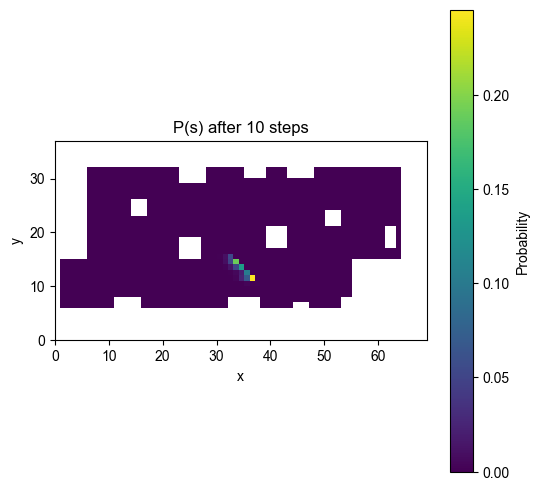

In [271]:
P_s = compute_state_distribution(P, policy, s0=0, T=40)
plot_state_distribution(P_s, state_map, title="P(s) after 10 steps")


In [277]:
def plot_multiple_distributions(P, policy, state_map, s0=0, steps=[10,20,30,40,50]):
    n = len(steps)
    fig, axes = plt.subplots(1, n, figsize=(4*n, 5), sharex=True, sharey=True)

    canonical_map = state_map.T
    W, H = canonical_map.shape

    for ax, T in zip(axes, steps):
        # Compute P(s) after T steps
        P_s = compute_state_distribution(P, policy, s0=s0, T=T)

        # Build grid for plotting
        grid = np.full((H, W), np.nan, dtype=float)
        for x in range(W):
            for y in range(H):
                s = canonical_map[x, y]
                if s >= 0:
                    grid[y, x] = P_s[s]

        # Plot with individual colorbar
        im = ax.imshow(grid, origin="lower", cmap="viridis",
                       extent=[0, W, 0, H], interpolation="nearest", aspect="equal")
        ax.set_title(f"P(s) after {T} steps")
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04, label="Probability")

    plt.tight_layout()
    plt.show()


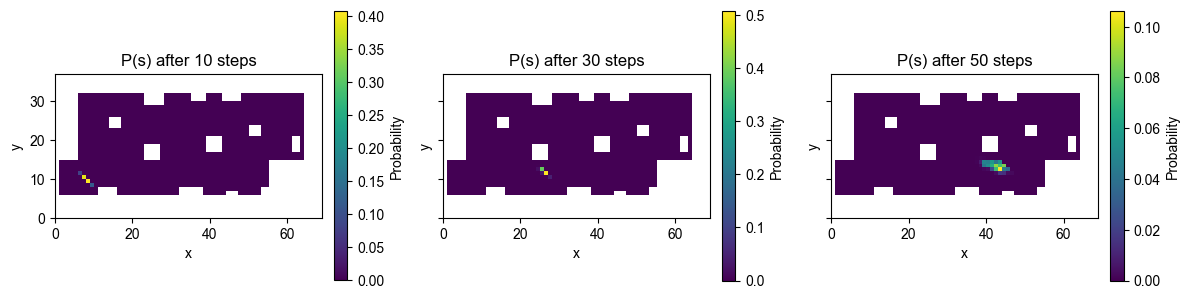

In [278]:
plot_multiple_distributions(P, policy, state_map, s0=0, steps=[10,30,50])


In [279]:
# pi(a)
def get_Pi_a(P, policy, s0, T):
    """
    Compute marginal action distribution π(a) after T steps.
    """
    # State distribution at T
    P_s = compute_state_distribution(P, policy, s0, T)

    # Weighted average of π(a|s) across states
    pi_a = np.sum(P_s[:, None] * policy, axis=0)

    # Normalize (safety)
    pi_a /= pi_a.sum()
    return pi_a

def get_decision(P, policy, s0, T):
    """
    Compute decision terms through time (like relative entropy).
    """
    decisions = []
    for t in range(T):
        # Marginal π(a) at time t
        pi_a = get_Pi_a(P, policy, s0, t)

        decision_terms = []
        for s in P.keys():  # all states
            if np.any(policy[s] > 0):
                decision_term = np.sum(
                    policy[s] * (np.log(policy[s] + 1e-15) - np.log(pi_a + 1e-15))
                )
                decision_terms.append(decision_term)
        decisions.append(decision_terms)
    return decisions

In [280]:
# Example: compute π(a) after 20 steps
pi_a_20 = get_Pi_a(P, policy, s0=0, T=20)
print("π(a) after 20 steps:", pi_a_20)
print("Sum:", pi_a_20.sum())  # should be ~1

π(a) after 20 steps: [1.00200872e-03 5.03439224e-02 9.00684523e-06 1.11558237e-06
 9.48643946e-01]
Sum: 1.0


In [281]:
# Compute π(a) for multiple horizons
steps = [0, 10, 20, 30, 50, 100]
for T in steps:
    pi_a = get_Pi_a(P, policy, s0=0, T=T)
    print(f"T={T}: {pi_a}")

T=0: [4.68056696e-05 5.08647094e-01 4.68056696e-05 4.68056696e-05
 4.91212489e-01]
T=10: [1.18544112e-03 2.66131571e-01 4.75521284e-06 1.42032600e-06
 7.32676813e-01]
T=20: [1.00200872e-03 5.03439224e-02 9.00684523e-06 1.11558237e-06
 9.48643946e-01]
T=30: [5.61779764e-03 3.92619425e-02 1.14646172e-03 7.39399432e-05
 9.53899858e-01]
T=50: [0.08810271 0.06338155 0.09518873 0.0106608  0.74266621]
T=100: [0.26643706 0.17731671 0.17731684 0.18946463 0.18946476]


In [282]:
# Decision terms up to horizon 20
decisions = get_decision(P, policy, s0=0, T=20)

# decisions[t] = list of decision terms (one per state) at time t
print("Decision terms at t=5:", decisions[5][:10])  # first 10 states

Decision terms at t=5: [np.float64(0.23192175577032412), np.float64(0.23138671359517626), np.float64(0.23739819685298738), np.float64(0.2717953010873877), np.float64(0.4632995527257756), np.float64(1.6016512220257308), np.float64(2.061448731435961), np.float64(11.054898202267173), np.float64(11.66235123821662), np.float64(12.603435769636347)]


In [287]:
def decision_term_map(P, policy, t):
    """
    Compute decision term per state at time t.
    Returns: dict {state: value}
    """
    pi_a = get_Pi_a(P, policy, s0=0, T=t)
    values = {}

    for s in P.keys():
        if np.any(policy[s] > 0):
            values[s] = np.sum(
                policy[s] * (np.log(policy[s] + 1e-15) - np.log(pi_a + 1e-15))
            )
    return values

def plot_decision_map(P, policy, state_map, t, ax=None):
    """
    Plot decision terms over the grid at time t.
    """
    decision_vals = decision_term_map(P, policy, t)
    canonical_map = state_map.T
    W, H = canonical_map.shape

    grid = np.full((H, W), np.nan)
    for x in range(W):
        for y in range(H):
            s = canonical_map[x, y]
            if s in decision_vals:
                grid[y, x] = decision_vals[s]

    if ax is None:
        fig, ax = plt.subplots(figsize=(6,6))
    im = ax.imshow(grid, origin="lower", cmap="coolwarm",
                   extent=[0, W, 0, H], interpolation="nearest", aspect="equal")
    ax.set_title(f"Decision terms at t={t}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    plt.colorbar(im, ax=ax, label="Decision term")
    return im

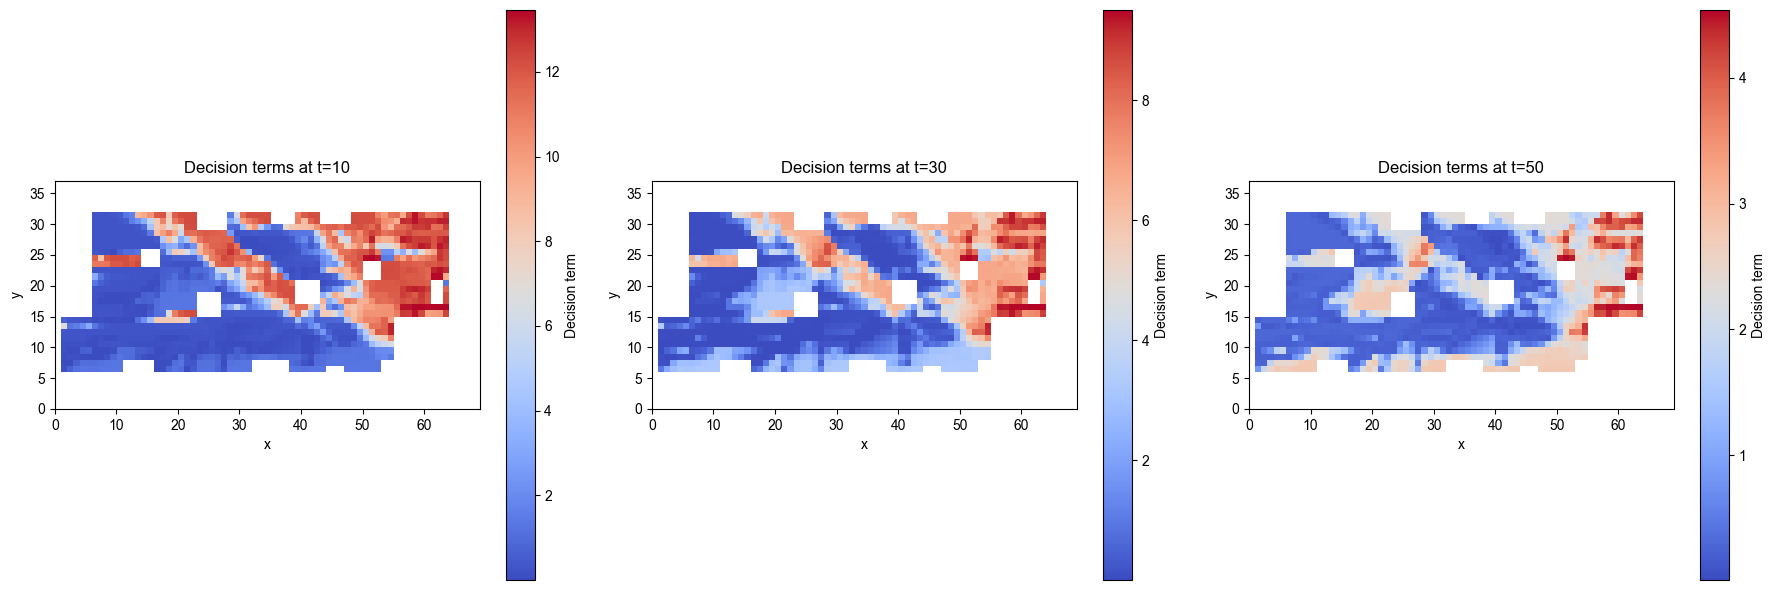

In [288]:
fig, axes = plt.subplots(1, 3, figsize=(18,6))
for ax, t in zip(axes, [10, 30, 50]):
    plot_decision_map(P, policy, state_map, t, ax=ax)

plt.tight_layout()
plt.show()

# Videos

In [1]:
def run_and_save(env, policy, state_map, folder="frames", n_steps=200):
    os.makedirs(folder, exist_ok=True)
    obs, _ = env.reset()
    x, y = env.agent_pos
    current_state = np.flipud(state_map).T[x, y]

    for step in range(n_steps):
        # Pick action from policy
        probs = policy[current_state]
        a = np.random.choice(len(probs), p=probs)
        obs, _, done, _, _ = env.step(a)

        # Render frame as numpy array
        frame = env.render()

        # Save frame to disk
        plt.imsave(f"{folder}/frame_{step:04d}.png", frame)

        # Update state
        x, y = env.agent_pos
        current_state = np.flipud(state_map).T[x, y]

        if done:
            break

In [2]:
class QVideo:
    @staticmethod
    def clear_folder(folder_name):
        files = glob.glob(os.path.join(folder_name, "*.png"))
        for f in files:
            os.remove(f)

    @staticmethod
    def create_video_from_images(image_folder, output_file, fps=10):
        """
        Create a video from a sequence of saved PNG frames.
        """
        image_pattern = os.path.join(image_folder, "frame_*.png")
        image_files = sorted(glob.glob(image_pattern))
        clip = ImageSequenceClip(image_files, fps=fps)
        clip.write_videofile(output_file, codec="libx264", audio_codec="aac")

In [3]:
env_v = SimpleEnv(render_mode= "rgb_array", mask = mask, reward_mask= None)
env_v.reset();

NameError: name 'SimpleEnv' is not defined

In [ ]:
# Step 1: run and save rollout
run_and_save(env_v, policy, state_map, folder="frames", n_steps=100)

# Step 2: stitch into video
QVideo.create_video_from_images("frames", "simulation.mp4", fps=10)


[DEBUG] Initialized grid 69x37, agent at (1, 30)


Exception ignored in: <function WeakMethod.__new__.<locals>._cb at 0x16dace5c0>
Traceback (most recent call last):
  File "/Users/iuliarusu/miniconda3/envs/IBP/lib/python3.11/weakref.py", line 53, in _cb
    def _cb(arg):

KeyboardInterrupt: 
